# Week 3: Statistics and Hypothesis Testing



<hr style="border:2px solid gray">


# Outline

1. [Section One: Introduction to Statistics](#section-one-introduction-to-statistics)
1. [Section Two: Hypothesis Testing](#section-two-hypothesis-testing)
1. [Section Three: Goodness of Fit](#section-three-goodness-of-fit)
1. [Section Four: Exercises](#section-four-exercises)

<hr style="border:2px solid gray">


# Section One: Introduction to Statistics[^](#outline)

Up to this point we have discussed probability, because in many physics experiments we are measuring quantities that are ultimately random variables. This allows us to predict how often we might measure the various possible outcomes of our experiment. Statistics, on the other hand, involves studying data we measure to try to determine the values and uncertainties of physical quantities. 

We can therefore think of these two as inverse problems of one another:
* Studying probabiltiy allows us to take physical constants and predict likely outcomes of an experiment
* Studying statistics allows us to take the actual outcome of an experiment and find the values of physical constants that are compatible with data

We can make statistics that summarise data, e.g. find the mean and standard deviation of a dataset we have recorded.

<hr style="border:2px solid gray">

# Section Two: Hypothesis Testing[^](#outline)

When we have measured data in an experiment, we may wish to see if the data we have measured is consistent with a particular probability distribution, corresponding to a specific physical process. 

In general, the distribution may be parameterless or have some parameter we are interested in testing a value of. For example, consider a probability distribution with some parameter $\theta$, that we think has the value $\theta_0$. We want to see if this value for $\theta$ is allowed by our data; we can refer to this as testing the **hypothesis** that $\theta = \theta_0$. We refer to this hypothesis as the **null hypothesis** $H_0$.

What do we mean when we say we want to test if the data we have is consistent with a probability distribution? Consider some hypothesised PDF $f(X)$, and a single measurement $X_m$. 

* If the hypothesis is correct (i.e. that the random variable $X$ is distributed according to $f(X)$), then we expect the measurement $X_m$ to be in a region where the PDF is large
* If the measured value $X_m$ lies in a region of the PDF with low probability, we would reject the hypothesis that this random variable is distributed according to this PDF

How do we quantify whether the PDF value is small or large? Of course, the avsolute value of the PDF is not useful and really we care about the integral over the PDF to determine the probability of a measurement. We need to define a **rejection region** (or **critical region**) which is a range of values of $X_m$ for which we reject the null hypothesis. Typically, we define the rejection region such that there is a specific probability that a measurement could randomly be in the critical region, referred to as the **significance level** $\alpha$. We can define $\alpha$ according to

\begin{equation*}
\alpha = \int_{\text{Rejection region}}f(X) dX
\end{equation*}
i.e. the significance level is the integral of the PDF over the rejection region. 

For example, if we have a significance level of $\alpha = 0.05$ i.e. 5%, for a random variable $X$ distributed according to $f(X)$ there is a 5% chance that the value of this random variable lies in our rejection region. We could therefore reject the hypothesis even if it is true, and indeed would expect to do so 5% of the time. This is referred to as a **Type I error**, and is unavoidable as it is a consequence of probability.

It is also common to define something called a **confidence interval**, which is more important when we discuss parameter estimation next week but is commonly used terminology for finding rejection regions using `scipy`. Whereas we have defined the significance level $\alpha$ as the probability a measurement $X$ lies in our rejection region, the confidence interval corresponds to all values of $X$ *not* in the rejection region, which we often refer to with a probability as well. For example, the 95% confidence interval corresponds to the region in which we expect a measurement to be 95% of the time. If we make a measurement $X$ that lies outside of this region, we could say we reject the hypothesis at a 5% significance level as that measurement is by definition in the rejection region with a 5% significance level.

Due to the Central Limit Theorem, the normal distribution is most common. The plot below shows a standard normal distribution ($\mu = 0$, $\sigma = 1$) with the shaded region indicating the rejection region correspoinding to a 5% significance level.



<img src='Week3_plots/two-sided_rejection_region.png' align='center' width=600>

*Standard normal distribution with the rejection region corresponding to a 5% confidence interval represented by the shaded region. Any measurement $X$ distributed according to $f(X)$ has a 5% probability of lying in the rejection region by chance.*



You can reduce the frequency of Type I errors by reducing the size of the rejection region (and the significance level), but in turn this makes us less likely to reject the null hypothesis even if it is false. There is a balancing act between these two effects that must be considered.

We cannot prove a hypothesis true; even if $X_m$ is in the highest probability region of the PDF, there is no guarantee that means that exact PDF is correct. As a result, all we can do is reject a hypothesis we deem to be false. If the measurement $X_m$ does not reject $H_0$ even though it is false, we make a so-called **Type II error**. Without knowing the true PDF, we cannot evaluate how likely a Type II error is. 

## The alternate hypothesis

However, it is not sufficient to only test the null hypothesis; instead, we must also have an **alternate hypothesis** $H_1$ for comparison. Depending on what we choose for the alternate hypothesis, our rejection regions can change significantly. To understand this:

* Consider a random variable $X$
* Null hypothesis: $X \sim f(X)$ for some probability distribution $f(X)$
* Alternate hypothesis: $X \sim g(X)$ for some different probability distribution $g(X)$
* Make a measurement $X_m$ of the random variable $X$ that lies in a low PDF region for the null hypothesis
* Even if $f(X_m)$ is small, if $g(X_m)$ is *smaller* we say the null hypothesis is still still more believable than the alternate hypothesis, so we cannot reject the null hypothesis

As a result, we can see that any regions for which $g(X)$ is *smaller* than $f(X)$ should not be included in our rejection region regardless of how probable the values of X are under the null hypothesis. In such regions, we have no reason to prefer the alternate hypothesis over the null hypothesis and so cannot reject the null hypothesis. 

Note: much like before, we *cannot* accept the alternate hypothesis under a hypothesis test, only decide whether we do or do not reject the null hypothesis. 

For example, consider some potential new physics theory that predicts a some new signal in the measurement of $X$. In the absence of this new theory, we expect $X$ to be distributed according to a Gaussian distribution centered at 0, whereas this new theory predicts $X$ distributed according to a Gaussian centered at 1. 

* For large positive values of $X$, we can safely reject the null hypothesis  
* However, if we measure a large negative value of $X$, although this is unlikely under the null hypothesis $H_0$, it is even less likely under the alternate hypothesis $H_1$ and so we cannot reject the null hypothesis 
* As a result, we do not have a rejection region for large negative values of $X$. 
* Instead, the size of the rejection region at large positive values is increased to cover the total desired significance level

A plot of this situation, for the desired significance level of 5%, is shown in the figure below. The left plot shows the null hypothesis rejection region without considering an alternate hypothesis, while the right shows the new rejection region after we have considered the alternate hypothesis. Clearly, the alternate hypothesis significantly alters our rejection region.

<img src='Week3_plots/alternate_hypothesis_example.png' align='center' width = 1000>

## Composite alternate hypotheses

While sometimes we may have a well defined PDF for our alternate hypothesis, this is not always the case. There are two main cases we can consider:

* In our signal-background example, we may not know the parameters of the signal distribution but we know that it should predict $X > 0$
    * As a result, know $H_0$ PDF is higher than $H_1$ PDF for $X \leq 0$
    * Use one-sided test

<br>


* Alternate hypothesis may be equally likely to shift value up or down
    * Have minimal information about alternate hypothesis, but as each direction is equally likely use a two-sided rejection region (as shown at first)
    * Effectively assuming a uniform distribution as the alternate hypothesis, to define the rejection region



## Hypothesis testing for discrete distributions

So far we have talked about finding intervals with specific significance levels. In general, the same principles map well to to discrete distributions, but not 100%; because probabilities are not continuous in discrete distributions, it is therefore not usually possible to find a rejection region with exactly our chosen significance level.

For example, consider flipping a coin 10 times. Depending on the result, we can calculate if the result is consistent with the coin being unbiased. These measurements obey a binomial distribution, with possible outcomes heads or tails. If the coin is unbiased, we would expect the probability of a heads to be equal to the probability of a tails, $p = 0.5$. 

* Null hypothesis $H_0$: p = 0.5
* Alternate hypothesis $H_1$: coin is biased, i.e. p < 0.5 or p > 0.5
* Hypothesis test is therefore two-sided rejection region
* Choose significance level of 5%

The figure below shows the distribution of the number of successes for the null hypothesis. 



<img src='Week3_plots/binomail_pmf.png' align='center' width = 600>

*Probability distribution for null hypothesis that the coin is unbiased, for 10 flips of the coin.*

Because we are working with a two-tailed hypothesis test, we need to calculate probabilities symmetrically, i.e. probability of 10 heads or 10 tails, then probability of 9 heads or 9 tails, etc. Under the null hypothesis, these work out as follows:

* 10 heads or tails: 1/1024 for each (total: 2/1024)
* 9 heads or tails: 10/1024 for each (total: 20/1024)
* 8 heads or tails: 45/1024 for each (total: 90/1024)

If we set our rejection region as 10 heads, 10 tails, 9 heads or 9 tails we have a total probability of 22/1024 = 2.1%, which is obviously less than 5%. If we also include 8 heads or tails in the rejection region, the total probability is 112/1024 = 10.9% and so greater than 5%. How can we choose the rejection region?

The figure below shows the two-tailed rejection regions for the coin flipping experiment for the two possible rejection regions described above. 



<img src='Week3_plots/discrete_binomial_rejection_regions.png' align='center' width=1000>

*Two possible rejection regions for the coin flipping experiment, labelled by the significance level of the rejection regions.*



In general, it is better to label our significance level with a larger value than is the true probability of that region. 

Consider the continuous case once again: say we choose a 5% rejection region, and make a measurement $X_m$ that falls within this rejection region. However, if we had alternatively chosen a 10% rejection region, it would completely include the 5% rejection region and the measurement $X_m$ would also reject the hypothesis at the 10% level as well as the 5% level.

A rejection at a lower significance level can be interpreted as a rejection at a higher significance level, as the higher significance level by definition totally includes the lower significance level.



## Implementations of significance levels

In `scipy.stats`, it is easy to find the values of $X$ to define the rejection region for a given significance level, for a given distribution. As we have seen before, the syntax for different probability distributions in scipy is very similar. All are based on the `rv_continuous` (or `rv_discerete`) class, which is used to define continuous (discrete) random variables. The two most useful methods for finding region regions are `ppf` and `interval`:

* `ppf` : returns the inverse of the CDF for the distribution; this is the same as the manually computed inverse functions we were looking at last week. `ppf(a)` of some value $0 \leq a \leq 1$ returns the value of $X$ that gives the cumulative probabilty $a$ for your distribution
* `interval` : returns the confidence interval with equal areas around the median of the distribution. For desired confidence value $a$, uses the `ppf` function to to calculate the boundaries of the interval: returns `ppf([(1 - a)/2, (1+a)/2])`. The lower bound of the confidence interval is the upper bound on the lower rejection region, and the upper bound of the confidence interval is the lower bound on the upper rejection region.

An example of using this can be seen in the code cell below. 



In [27]:
from scipy.stats import norm

a = 0.05 # 5% significance level

# Standard normal distribution, 5% significance level corresponds to 95% confidence interval
interval = norm.interval(1 - a, loc = 0, scale = 1)
print(interval) 


(-1.959963984540054, 1.959963984540054)


We can then plot the PDF and show the rejection region we have calculated:

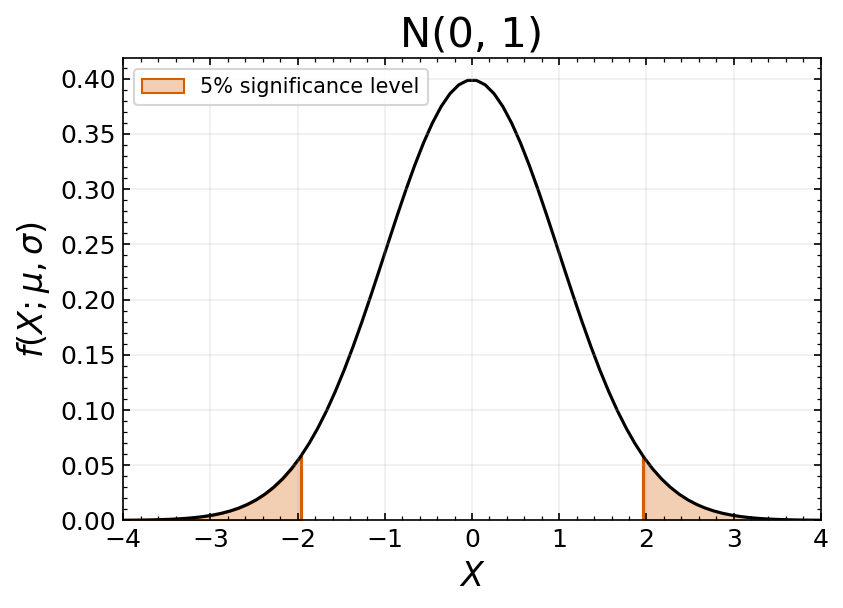

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import to_rgba

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 150)
ax.plot(np.linspace(-5,5,100),norm.pdf(np.linspace(-5,5,100)),color='black', zorder = 1)
ax.set_ylim(bottom = 0)
ax.set_xlim(-4,4)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$f(X; \mu, \sigma)$',fontsize = 16)
ax.tick_params(direction='in',top=True,right=True,which='both',labelsize =12)
ax.plot([interval[0],interval[0]],[0,norm.pdf(interval[0])-0.001],color='#D55E00',zorder = 0)
ax.plot([interval[1],interval[1]],[0,norm.pdf(interval[1])-0.001],color='#D55E00',zorder = 0)
ax.fill_between(np.linspace(-5,interval[0],100),np.repeat(0,100),norm.pdf(np.linspace(-5,interval[0],100)),zorder = 0,fc=to_rgba('#D55E00',0.3),edgecolor = '#D55E00',label='5% significance level')
ax.fill_between(np.linspace(interval[1],5,100),np.repeat(0,100),norm.pdf(np.linspace(interval[1],5,100)),zorder = 0,color='#D55E00',alpha = 0.3)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.legend(loc='upper left')
ax.set_title('N(0, 1)',fontsize = 20)
ax.grid('xkcd:dark blue',alpha = 0.2)

## Summary


In this section, we have presented the basic concepts of hypothesis testing, including:

* Rejection regions and significance levels
* Alternate hypotheses
* One-sided and two-sided hypothesis tests
* Hypothesis tests of discrete distributions
* Basics of significance level implementations in `scipy`

In the following section, we will discuss two different tests for measuring the goodness of fit of a model to data, and how this can link back to hypothesis testing.

<hr style="border:2px solid gray">


# Section Three: Goodness of Fit[^](#outline)

Intrinsically related to hypothesis testing is the idea of **goodness of fit**. You will learn in detail about fitting and parameter estimation next week, but for now know that it concerns using data you have measured to determine the best parameters of a given model to fit to the data. 

After we have determined some estimate for the parameters of the model for our data, we want to determine how well the model fits the data. This is referred to as finding the goodness of fit. We will talk first about a couple of common tests for goodness of fit, and then see how they relate to hypothesis testing.

## Kolmogorov-Smirnov tests

Named after Andrey Kolmogorov and Nikolai Smirnov, the Kolmogorov-Smirnov test (sometimes called a K-S test) is one of the most common tests to either compare a data sample with a reference probablity distribution, or compare two different data samples. These are referred to as **one-sample** and **two-sample** K-S tests respectively. Each answers a slightly different question, but with the same broad aim:

* One-sample: how likely is it that we would see these data samples if the data is drawn from that probability distribution?
* Two-sample: How likely is it that we would see these two sets of data samples if they are drawn from the same (but unknown) probability distribution?

To test empirical data, we first need to define the the **empirical cumulative distribution** of the data $F_{\text{data}}(X)$. This is defined as follows:

\begin{equation*}
F_{\text{data}}(X) = \frac{\text{number of data values} < X}{n},
\end{equation*}
where $n$ is the number of measurements in the dataset. For example, consider the standard normal distribution $N(0, 1)$. We can generate random samples from this dataset using scipy.stats, then calculate the empirical cumulative distribution:

In [2]:
from scipy.stats import norm
import numpy as np

samples = norm.rvs(size = 50)

def Fd(X):
    return np.count_nonzero(samples<X)/len(samples)

empirical = [Fd(X) for X in np.linspace(-3,3,100)]

Text(0.5, 1.0, 'Cumulative and empirical distribution\n functions for N(0, 1)')

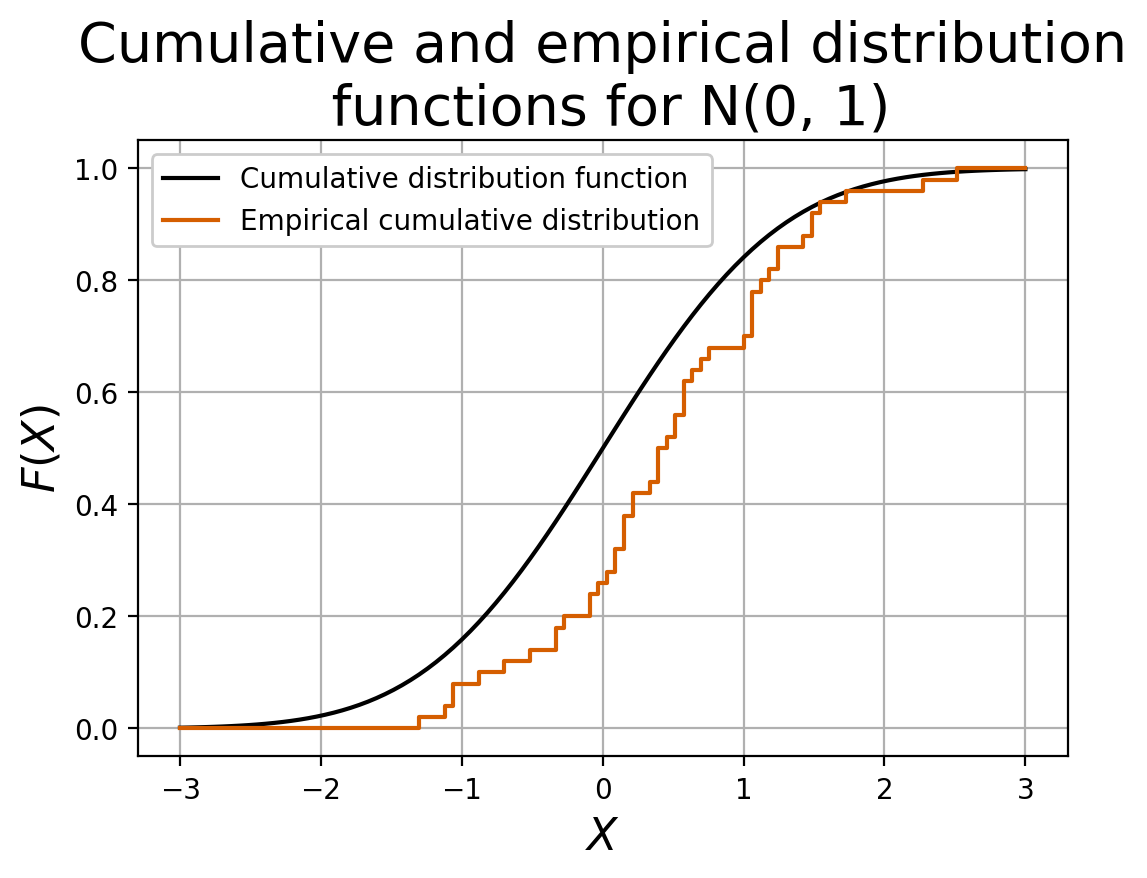

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(np.linspace(-3,3,100),norm.cdf(np.linspace(-3,3,100)),color='black', label = 'Cumulative distribution function')
ax.step(np.linspace(-3,3,100),empirical,color='#D55E00',label='Empirical cumulative distribution',where='post')
ax.legend(loc='upper left',framealpha = 1)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$F(X)$',fontsize =16)
ax.grid()
ax.set_title('Cumulative and empirical distribution\n functions for N(0, 1)',fontsize = 20)


As you can see, while the empirical distribution is close to the cumulative distribution it does vary. If we increase the amount of data, the empirical distribution will get closer to the true cumulative distribution function. In fact, in general the Kolmogorov-Smirnov test performs best for large amounts of data, because then the empirical distribution better approximates the true distribution that describes the data, regardless of whether that is the same as the distribution you are comparing to or not. 

For the one-sample test, we then wish to compute the maximum absolute distance between the empirical cumulative distribution $F_\text{data}(X)$ and the cumulative distribution function $G(X)$. This can be written as

\begin{equation*}
D = \text{sup}_X |F_\text{data}(X) - G(X)|,
\end{equation*}
where $\text{sup}_X$ refers to the supremum over $X$ and means that we take the largest value of $|F_\text{data}(X) - G(X)|$ over all values of $X$ in the empirical data set. 

In general, larger values of $D$ indicate worse agreement between the CDFs. We can calculate this for our standard normal data:

In [4]:
samples_cumulative = [Fd(X) for X in samples]

D = np.max(np.abs(samples_cumulative - norm.cdf(samples)))

print(D)

0.2547515229477265


So far we have generated empirical data from the distribution we are examining. Let us try instead generating data from a uniform distribution between -3 and 3, $U(-3,3)$, and comparing the distribution with the standard normal distribution.

0.23243649412360232


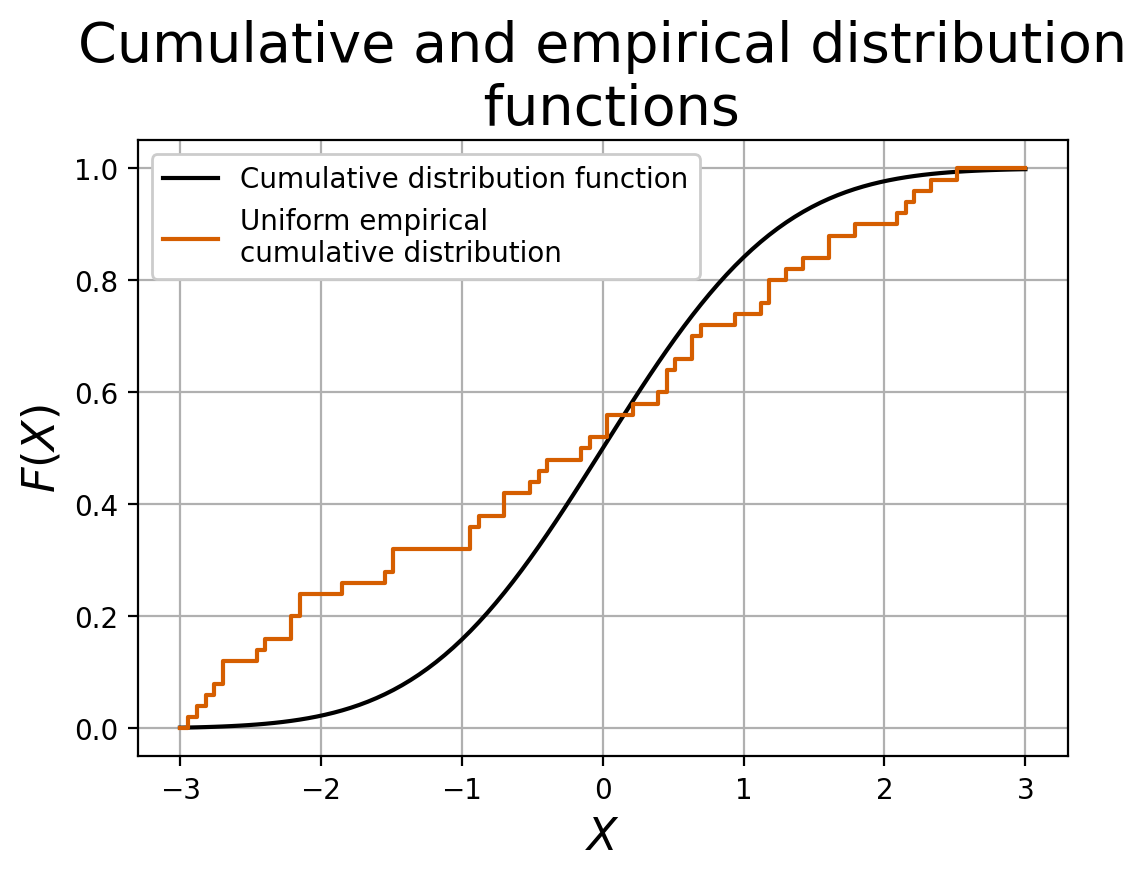

In [5]:
from scipy.stats import uniform

uniform_samples = uniform.rvs(loc = -3, scale = 6, size = 50)

def Fd_uniform(X):
    return np.count_nonzero(uniform_samples < X)/len(uniform_samples)

empirical_uniform = [Fd_uniform(X) for X in uniform_samples]

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(np.linspace(-3,3,100),norm.cdf(np.linspace(-3,3,100)),color='black', label = 'Cumulative distribution function')
ax.step(np.linspace(-3,3,100),[Fd_uniform(X) for X in np.linspace(-3,3,100)],color='#D55E00',label='Uniform empirical \ncumulative distribution',where='post')
ax.legend(loc='upper left',framealpha = 1)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$F(X)$',fontsize =16)
ax.grid()
ax.set_title('Cumulative and empirical distribution\n functions',fontsize = 20)

D_uniform = np.max(np.abs(empirical_uniform - norm.cdf(uniform_samples)))

print(D_uniform)


We can see that the value for $D$ in this case is significantly larger than for data generated according to the standard normal distribution. How do we decide what is a good enough value? We will see later.



In fact, the 1 sample Kolmogorov-Smirnov test is implemented in `scipy.stats` as `ks_1samp`. We can use it as follows:

In [6]:
from scipy.stats import ks_1samp

d1_D, d1_p = ks_1samp(samples, norm.cdf)
unif_D,unif_p = ks_1samp(uniform_samples, norm.cdf)

print("For sample from normal distribution, D = {:.3f} and p-value = {}".format(d1_D,d1_p))
print("For sample from uniform distribution, D = {:.3f} and p-value = {}".format(unif_D,unif_p))

For sample from normal distribution, D = 0.255 and p-value = 0.0023895394912067935
For sample from uniform distribution, D = 0.252 and p-value = 0.0026996643736268977


This returns not only the value of $D$, but also the p-value of the test (like we have seen for hypothesis testing). We will see how we can calculate p-values ourself for Kolmogorov-Smirnov tests later. We can clearly see that the normally distributed sample is much more likely to belong to the hypothesised distribution than the uniformly distributed sample (as we expected).

For a two-sample Kolmogorov-Smirnov test, rather than comparing empirical data with a well-defined distribution, we are comparing two different sets of empirical data. In this case, we need to compute the empirical cumulative distribution for both datasets. This is particularly useful in machine learning, to help evaluate performance of your model; you can try prediction on some of your training data, and compare the predicted values with some test data. You will see more of these concepts later in this course.

Here we will denote the empirical cumulative distributions for the two samples as $F_\text{data}(X)$ and $G_\text{data}(X)$ respectively. This test will allow us to determine if the two different empirical datasets are from the same underlying distribution. The distance $D_2$ is calculated according to

\begin{equation*}
D_2 = \text{sup}_X|F_\text{data}(X) - G_\text{data}(X)|.
\end{equation*}
where symbols have the same meanings as before. Once again, larger values of $D_2$ indicate greater disagreement between the two distributions. We can see this by comparing some normally distributed data with either more normally distributed data, or uniformly distributed data:

Text(0.5, 1.0, 'Empirical distribution\n functions')

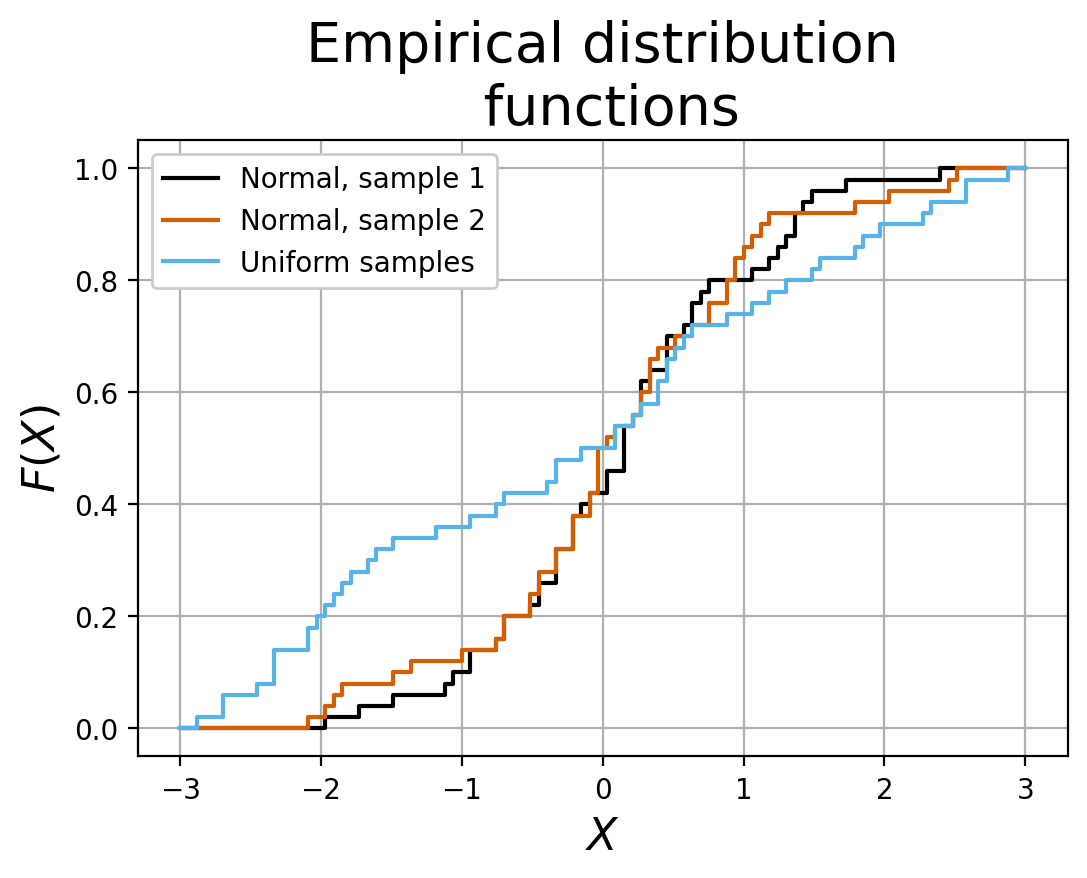

In [18]:
np.random.seed(10) # Set the random seed for consistency

samples_normal_1 = norm.rvs(size = 50)
samples_normal_2 = norm.rvs(size = 50)
samples_uniform = uniform.rvs(loc=-3,scale=6,size = 50)

def Fd_normal_1(X):
    return np.count_nonzero(samples_normal_1 < X)/len(samples_normal_1)

def Fd_normal_2(X):
    return np.count_nonzero(samples_normal_2 < X)/len(samples_normal_2)

def Fd_uniform(X):
    return np.count_nonzero(samples_uniform  < X)/len(samples_uniform)

empirical_normal_1 = [Fd_normal_1(X) for X in np.linspace(-3,3,100)]
empirical_normal_2 = [Fd_normal_2(X) for X in np.linspace(-3,3,100)]
empirical_uniform = [Fd_uniform(X) for X in np.linspace(-3,3,100)]

fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.step(np.linspace(-3,3,100),empirical_normal_1,color='black', label = 'Normal, sample 1', where='post')
ax.step(np.linspace(-3,3,100),empirical_normal_2,color='#D55E00', label = 'Normal, sample 2', where='post')
ax.step(np.linspace(-3,3,100),empirical_uniform,color='#56B4E9', label = 'Uniform samples', where='post')

ax.legend(loc='upper left',framealpha = 1)
ax.set_xlabel('$X$',fontsize = 16)
ax.set_ylabel('$F(X)$',fontsize =16)
ax.grid()
ax.set_title('Empirical distribution\n functions',fontsize = 20)



To evaluate the Kolmogorov-Smirnov statistic for the 2 sample case, we should evaluate each CDF at each point in both sets of samples. 

In [19]:
all_samples_normal = np.concatenate([samples_normal_1, samples_normal_2])
all_samples_uniform = np.concatenate([samples_normal_1, samples_uniform])

D_normal = np.max(np.abs(np.array([Fd_normal_1(X) for X in all_samples_normal]) - np.array([Fd_normal_2(X) for X in all_samples_normal])))
D_uniform = np.max(np.abs(np.array([Fd_normal_1(X) for X in all_samples_uniform]) - np.array([Fd_uniform(X) for X in all_samples_uniform])))

print("Comparing normal sample 1 and normal sample 2: D = {}".format(D_normal))
print("Comparing normal sample 1 and uniform sample: D = {}".format(D_uniform))

Comparing normal sample 1 and normal sample 2: D = 0.10000000000000003
Comparing normal sample 1 and uniform sample: D = 0.3


Clearly, the agreement is much better between normal sample 1 and normal sample 2 than between normal sample 1 and the uniform sample (as you would expect).

Once again, the 2-sample KS test is implemented in `scipy.stats` as `ks_2samp`. Again, this also returns the p-value of the test, which we will discuss later.

In [20]:
from scipy.stats import ks_2samp

print('Comparison of normal 1 and normal 2: D = {}, p-value = {}'.format(*ks_2samp(samples_normal_1, samples_normal_2)))
print('Comparison of normal 1 and uniform: D = {}, p-value = {}'.format(*ks_2samp(samples_normal_1, samples_uniform)))

Comparison of normal 1 and normal 2: D = 0.1, p-value = 0.9667464356809096
Comparison of normal 1 and uniform: D = 0.3, p-value = 0.02170784069014051


## The $\chi^2$ goodness of fit test

You will have heard of the $\chi^2$ test before; this allows us to compare a fitted function to data to determine if the data is well described by the fit. Formally, for a set of measurements $\{X_i,y_i\}$ and some fit function $f(X; \boldsymbol{\theta})$ with vector of parameters $\theta$, we want to work out if the function $f(X; \boldsymbol{\theta})$ models the data well, and if any deviation is explained as purely statistical. 

To calculate the $\chi^2$, we first must calculate the **pull** of each point, which is the difference between the data $y_i$ and the prediction at the same point $f(X_i; \boldsymbol{\theta})$, weighted by the uncertainty $\sigma_i$ on the measurement $y_i$. This is written as:

\begin{equation*}
p_i = \frac{y_i - f(X_i; \boldsymbol{\theta})}{\sigma_i},
\end{equation*}

where $p_i$ is the pull for the $i$-th data point. 

We can then define the $\chi^2$ as a function of the parameters $\boldsymbol{\theta}$, given the measurements $y_i$, as the sum of the square of the pulls:

\begin{equation*}
\chi^2(\boldsymbol{\theta}; y_i) = \sum_i p_i^2 = \sum_i \frac{y_i - f(X_i; \boldsymbol{\theta})}{\sigma_i},
\end{equation*}
where here we have explicitly written the $\chi^2$ as a function of the parameters $\boldsymbol{\theta}$ of the fit function $f(X; \boldsymbol{\theta})$. We can use the $\chi^2$ to estimate parameters, which you will see next week. 

As well as being able to use this quantity to optimise the choice of parameters $\boldsymbol{\theta}$, the value of the $\chi^2$ for specific $\boldsymbol{\theta}$ values tells us about the quality of the fit. 

We will first make one key assumption: that if our fit is a good fit, the $y_i$ are random variables distributed according to a normal distribution $N(f(X_i;\boldsymbol{\theta}),\sigma_i)$ i.e. with mean $f(X_i;\boldsymbol{\theta})$ and standard deviation $\sigma_i$. The pulls $p_i$ are therefore standard normally distributed random variables. 

If we have a good fit, we expect the $y_i$ to deviate from the mean by values similar to $\sigma_i$, under this assumption of a normal distribution. We therefore expect the square of each pull $p_i^2 \sim 1$, so the $\chi^2$ value for a good fit should be $\sim N_\text{data}$ i.e. similar to the number of data points. 

In practise, rather than comparing to the number of data points, we actually need to compare to the number of **degrees of freedom**, which is the difference between the number of data points and the number of fit parameters:

\begin{equation*}
N_\text{dof} = N_\text{data} - N_\text{params}
\end{equation*}

A fit is needed if $N_\text{dof}$ > 0. For $N_\text{dof}$ = 0, the parameters of the model can be analytically determined so fitting is unnecessary. For $N_\text{dof}$ < 0, the system is underconstrained and cannot be uniquely solved. 

We can define the **reduced chi-squared statistic** as the $\chi^2$ per degree of freedom, $\chi^2_\nu = \frac{\chi^2}{N_\text{dof}}$. A reduced chi-squared value of 1 is considered a good fit; a value significantly greater than 1 is considered a poor fit, whereas values less than 1 are considered signs of overfitting. You will see more on overfitting next week.




## Test statistics and hypothesis testing

So far we have talked about a couple different tests for goodness of fit, but not really talked about how we can identify what values of these tests give a good fit. In fact, both the Kolmogorov-Smirnov tests and the $\chi^2$ test link back to hypothesis testing. 

In general, when we are evaluating a fit, we calculate a **test statistic** that describes our data, in the context of the model we are trying to fit/compare with. In the case of the Kolmogorov-Smirnov test, the test-statistic is the distance $D$, while in the case of the $\chi^2$ test the value of the $\chi^2$ itself is the test-statistic. Because these test-statistics are functions of random variables, they themselves are random variables and are therefore samples from some distribution. 

## Calculating p-values from $\chi^2$ tests

Last week, we saw the $\chi^2$ distribution is the sum of the squares of standard normal random variables. Of course, as we saw previously if we assume $y_i$ is normally distributed with mean $f(X_i; \boldsymbol{\theta})$ and standard deviation $\sigma_i$ then the pulls $p_i$ are distributed according to a standard normal distribution. As a result the $\chi^2$, the sum of the square of the pulls, is a sum of squares of standard normal random variable, and as such is a sample from the $\chi^2$ distribution with the number of degrees of freedom equal to the number of degrees of freedom of the fit. 

Because the $\chi^2$ is a sample from a probability distribution, we can calculate a p-value for a given fit i.e. how likely the value is to be drawn from the corresponding distribution. Effectively, our $\chi^2$ test is a hypothesis test with the null hypothesis being that $y_i$ is distributed according to a normal distribution with mean $f(X_i; \boldsymbol{\theta})$ and standard deviation $\sigma_i$. 

For a given dataset with $N_\text{dof}$ degrees of freedom, we can calculate the p-value of the fit parameters $\boldsymbol{\theta}$ using the $\chi^2$; We can do this with a one-sided test of the $\chi^2$ distribution and our value $\chi^2(\boldsymbol{\theta}; y_i)$. 

Consider a fit with $N_\text{dof}$ = 5, and a value $\chi^2(\boldsymbol{\theta}; y_i) = 7.64$. We can choose a significance level of 5% and perform a hypothesis test that our test statistic $\chi^2(\boldsymbol{\theta}; y_i)$ is distributed according to the $\chi^2$ distribution with 5 degrees of freedom: 

Text(0, 0.5, 'f($\\chi^2$; 5)')

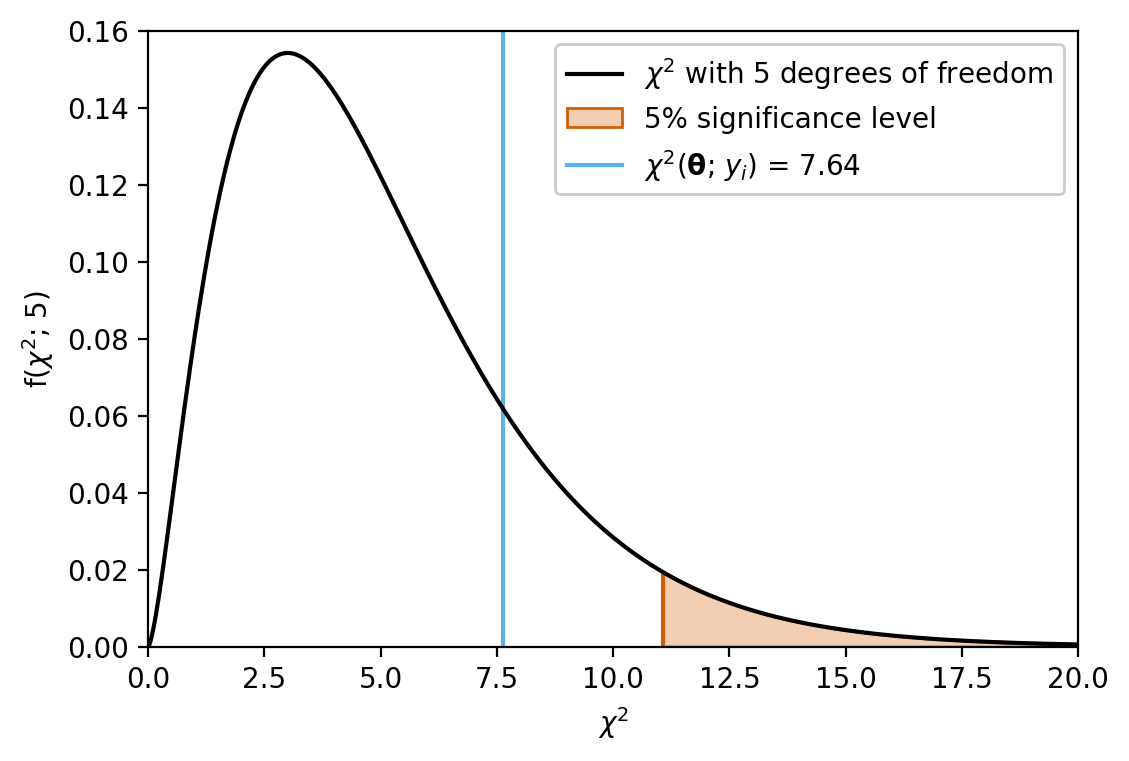

In [10]:
from scipy.stats import chi2
from matplotlib.colors import to_rgba

value = 7.64

X = np.linspace(0,20,1000)
fig, ax = plt.subplots(1,1,figsize = (6,4),dpi = 200)
ax.plot(X, chi2.pdf(X, 5), label='$\chi^2$ with 5 degrees of freedom',color='black',zorder = 1)
ax.plot([chi2.ppf(0.95,5),chi2.ppf(0.95,5)],[0,chi2.pdf(chi2.ppf(0.95,5),5)-0.001],zorder = 0,color='#D55E00')
ax.fill_between(np.linspace(chi2.ppf(0.95,5),25,1000),np.repeat(0,1000),chi2.pdf(np.linspace(chi2.ppf(0.95,5),25,1000),5),fc=to_rgba('#D55E00',0.3),label='5% significance level',edgecolor='#D55E00',zorder = 0)
ax.plot([value, value],[0,0.17],color='#56B4E9',zorder = 0,label=r'$\chi^2$($\mathbf{\theta}$; $y_i$) = 7.64')
ax.set_ylim(bottom = 0, top = 0.16)
ax.set_xlim(0,20)
ax.legend(loc='upper right',framealpha = 1)
ax.set_xlabel('$\chi^2$')
ax.set_ylabel('f($\chi^2$; 5)')

Clearly, our value of $\chi^2$ is outside of our chosen rejection region and so we do not reject the hypothesis that our $\chi^2$ is distributed according to the $\chi^2$ distribution with 5 degrees of freedom. We therefore do not reject the hypothesis that our data is normally distributed about our model with standard deviation $\sigma_i$. 

What is the p-value for our data? We can calculate it using `chi2.sf`, which is equivalent to 1 - `chi2.cdf`:

In [11]:
print(chi2.sf(value, 5))

0.17722382548124416


We therefore say that there is a 17.7% chance our data is distributed according to our null hypothesis. 

It is also possible to give a bit more context to the reduced $\chi^2$; as we said before, if we assume our $y_i$ are Gaussian distributed around our model $f(X_i)$ with standard deviation $\sigma_i$, then our pulls $p_i$ should be distributed according to a set of standard normal distributions (if our model is good). After we normalise our reduced $\chi^2$ by the number of degrees of freedom, a value of 1 means our average deviation from the model is about $1\sigma$, so our data deviates from the model by the amount we expect. As a result, we say that the model describes the data well.

There are different possible ways to interpret other values of the reduced chi squared. 

* For values greater than 1, average deviation is greater than $1\sigma$:
    1. The chosen model could have too few parameters to model the data well; you could be **underfitting**
    1. The choice of parameters $\boldsymbol{\theta}$ may not be correct even if the type of model is correct
    1. The uncertainty on measurements $\sigma_i$ could be underestimated
<br>
<br>
* For values less than 1, the average deviation is less than $1\sigma$:
    1. The chosen model could have too many parameters for the data; you could be **overfitting**
    1. The uncertainty on each data point could be overestimated

Because there are multiple possible explanations for different values of the reduced $\chi^2$, you need to be careful how you interpret your results. 

## Calculating p-values from Kolmogorov-Smirnov scores



Much like we have calculated p-values from $\chi^2$ values, we can do the same for Kolmogorov-Smirnov tests. We need to do this slightly differently for either one-sample or two-sample tests.

We will first setup up some common formalism between both problems. Let us denote the true distribution of the data as $F(X)$, and the other cumulative distribution $G(X)$. $G(X)$ can either be the analytic distribution we are testing against for a one-sample Kolmogorov-Smirnov test, or the true distribution of the second sample we are testing against for a two-sample Kolmogorov-Smirnov test. 

We can look at performing either a one-sided or a two-sided hypothesis test on the Kolmogorov-Smirnov statistic. These correlate to different null and alternate hypotheses:

* Two-sided test: Null hypothesis is $F(X) = G(X)$; alternate hypothesis is $F(X) \neq G(X)$
<br>

* One-sided test: there are two possible tests:
    1. Null hypothesis: $F(X) \geq G(X)$ for all $X$; alternate hypothesis $F(X) \lt G(X)$ for at least one value of $X$
    1. Null hypothesis: $F(X) \leq G(X)$ for all $X$; alternate hypothesis $F(X) \gt G(X)$ for at least one value of $X$


<div style="background-color:#FFCCCB">

The choice of specific hypothesis test also slightly changes our choice of test statistic; for example, if we are only interested in testing the null hypothesis that $F(X) \geq G(X)$, we don't care about any cases where $F(X) \gt G(X)$ and instead the points that influence our test the most are the points where $F(X) \lt G(X)$. As a result, we can define two other test statistics. As before, $F_{\text{data}}(X)$ denotes the cumulative distribution function of data sampled from some probability distribution with true CDF $F(X)$.  

\begin{align*}
D_+ &= \text{sup}_X(F_{\text{data}}(X) - G(X)) \\
D_- &= \text{sup}_X(G(X) - F_{\text{data}}(X)),
\end{align*}
where these statistics are written for the one-sample case but are defined equivalently for the two-sample case, just replacing $G(X)$ with $G_\text{data}(X)$. 

The two-sided test statistic $D$ can then be seen as $\text{max}(D_+, D_-)$.

### P-values for one-sample Kolomogorov-Smirnov tests

The one-sample Kolmogorov-Smirnov test aims to determine if a set of experimentally measured data $\{X_i\}$ is distributed according to some probability distribution $f(X)$ with corresponding CDF $F(X)$. Depending on our choice of a one-sided or two-sided test, the null hypothesis may vary but typically is that the data *is* distributed according to the probability distribution $f(X)$.

We will denote the Kolmogorov-Smirnov score $D$ for a set of data $\{X_i\}$ and a hypothesised probability distribution $f(X)$ as $D(X_i; f(X))$. We want to calculate the probability that this value is consistent with the probability distribution $f(X)$. 

If the null hypothesis is true, we expect $D$ to be a random variable distributed according to the Kolmogorov-Smirnov distribution. This distribution has a horrible functional form that we will not present here, but it is implemented well in `scipy.stats` for both one-sided and two-sided tests, as `scipy.stats.ksone` and `scipy.stats.kstwo` respectively.

First, we will calculate the p-value for a two-sided test for a sample generated from a standard normal distribution and the standard normal distribution itself. 

In [12]:
from scipy.stats import norm, kstwo

samples = norm.rvs(loc = 0, scale = 1, size = 50) # Generate the sample data we wish to test

xi_cumulative = [np.count_nonzero(samples < X)/len(samples) for X in samples] # Calculate empirical cumulative distribution
D = np.max(np.abs(xi_cumulative - norm.cdf(samples,loc = 0, scale = 1))) # Calculate D(X_i; f(X_i; theta))

p_value = kstwo.sf(D,len(samples))

print("D = {:.3f}, p-value = {}".format(D,p_value))


D = 0.109, p-value = 0.5575305289233599


We can compare the value we calculate in this manner with `scipy.stats.kstest`, which is a function that can be used for both one-sample and two-sample Kolmogorov-Smirnov tests. 

In [13]:
from scipy.stats import kstest

kstest(samples, norm.cdf)

KstestResult(statistic=0.12882486804232207, pvalue=0.34774548356133483)

<div style="background-color:#FFCCCB">


Note: we will see some slight discrepancies between these values. This is because the implementation in `scipy` treats the empirical cumulative distribution differently for $D_+$ and $D_-$, the reason for which is beyond the scope of this course. For high sample sizes, these results will converge. In practise you should use the `scipy` implementation rather than coding a method yourself. 

We can set significance levels for Kolmogorov-Smirnov values much like we can in any hypothesis test. For example, if we chose a 5% significance level for the data we have just computed the statistic for, we would accept the null hypothesis that the data is distributed according to the normal distribution. 

We can also calculate the statistic and the p-value for an empirical dataset that should not agree with the normal distribution. We will as before generate data corresponding to a uniform distribution $U(-3,3)$ between -3 and 3. 

In [14]:
u_samples = uniform.rvs(loc = -3, scale = 6, size = 50)

u_cumulative = [np.count_nonzero(u_samples < X)/len(u_samples) for X in u_samples]
D_u = np.max(np.abs(u_cumulative - norm.cdf(u_samples, loc = 0, scale = 1)))

p_value_u = kstwo.sf(D_u,len(u_samples))

print("D = {:.3f}, p-value = {}".format(D_u,p_value_u))

D = 0.284, p-value = 0.0004676723571360363


For this empirical dataset, we would therefore reject the null hypothesis at the 5% significance level.

### P-values for two-sample Kolmogorov-Smirnov tests

While in the one-sample case we can compare our value of $D$ to the Kolmogorov-Smirnov distribution, in the two-sample case things are a bit more complicated and the K-S distribution is not a good approximation until we reach very large sample sizes. Instead, we must rely on a method called the *inside method*. This calculates the distribution of possible values of $D$ through combinatorics, and is beyond the scope of this course. It is well-implemented in `scipy` as the backend for `ks_2samp`. We can calculate the p-values for comparing our two normally distributed samples and one of those samples with a uniform sample:

In [21]:
from scipy.stats import ks_2samp

print(ks_2samp(samples_normal_1, samples_normal_2))
print(ks_2samp(samples_normal_1,samples_uniform))

KstestResult(statistic=0.1, pvalue=0.9667464356809096)
KstestResult(statistic=0.3, pvalue=0.02170784069014051)


We can see from the p-values that the two normally distributed samples are much more likely to be from the same distribution, whereas we could reject the hypothesis that the first normal sample and the uniform sample are from the same distribution at the 5% significance level.

## Summary

In this section, we have covered two different tests of goodness-of-fit, including:

* One and two sample Kolmogorov-Smirnov tests
* The chi-squared goodness-of-fit test
* How to calculate p-values from both K-S tests and chi-squared tests

The following section covers the exercises for you to work through this week.

<hr style="border:2px solid gray">


# Section Four: Exercises [^](#outline)

* some example data from different distributions
* fake discovery idea; e.g. like higgs but made up
* Maybe dataset not to do with physics? marathon records?


<div style="background-color:#C2F5DD">


### Exercise 1

We are going to work with three different probability distributions, with specific parameters. The three distributions are as follows:

* `scipy.norm` with `loc = 3` and `scale = 0.5`
* `scipy.maxwell` with `loc = 1.5` and `scale = 1`
* `scipy.cosine` with `loc = 3` and `scale = 1`

Plot the PDFs of each of these distributions for the range $0 \leq X \leq 6$. Make sure your plots are clear and readable, including:

* Axis labels 
* A legend labelling each curve (or display them in different subplots)
* Clear colours




In [ ]:
from scipy.stats import norm, maxwell, cosine


# Your plotting code here




<div style="background-color:#C2F5DD">

### Exercise 2

The file 'one_sample_data.npy' contains three data sets in a single numpy array of shape [3, 500]; each of these datasets corresponds to one of the probability distributions you plotted in the previous exercise.

Load the dataset in 'one_sample_data.npy'. Using one-sample Kolmogorov-Smirnov tests, match up each set of data to the corresponding distribution it was generated according to. Look up the [syntax](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html) for `ks_1samp` to help you. Write your answer to which sample matches which distribution in the Markdown cell below the code cells.



In [ ]:
# Load the data

sample_1, sample_2, sample_3 = 

In [ ]:
from scipy.stats import ks_1samp

# Your code here



Your matching here

<div style="background-color:#C2F5DD">

### Exercise 3

What are the values of the Kolmogorov-Smirnov test statistic for each comparison (i.e. each data set and each distribution) and the corresponding p-values? 

Say our null hypothesis is that Sample 1 was distributed according to the Maxwell distribution, and the alternate hypothesis is that it is *not* distributed according to the Maxwell distribution. At what p-value can we reject this hypothesis?

Write your answers in the Markdown cell below.

Your answer here

<div style="background-color:#C2F5DD">

### Exercise 4

The files 'two_sample_test_to_match.npy' and 'two_sample_test_options.npy' contain samples from several normal distributions, with different $\mu$ and $\sigma$. Your task is to to see which of the three test samples in 'two_sample_test_options.npy' is most likely to be from the same distribution as the target sample in 'two_sample_test_to_match.npy'. To do this, you should:

* Load the data
* Define the empirical cumulative functions for each test sample, and plot them against the target sample
* Use `ks_2samp` to calculate the Kolmogorov-Smirnov test statistic and the p-value for each sample
* Finally, write your answer as to which test sample is most probable to match the target sample in the Markdown cell after the code cells

In [ ]:
# Load the data

target_sample = 

sample_1, sample_2, sample_3 = 

In [ ]:
# Define empirical cumulative functions



In [ ]:
# Plot empirical cumulative functions



In [ ]:
# Run Kolmogorov-Smirnov tests



Your answer here



<div style="background-color:#C2F5DD">

### Exercise 5

We are now going to return to the simple pendulum data you plotted in Week 1. As a reminder, this data should obey the relation between pendulum length and period, given as

\begin{equation*}
T = 2\pi\sqrt{\frac{L}{g}}
\end{equation*}
where $L$ is the pendulum length in $m$, $T$ is the pendulum time period in $s$, and $g$ is the acceleration due to gravity, in $ms^{-2}$.

Using the value of $g$ provided in the file, perform a $\chi^2$ goodness of fit test for this data. What is the value of the chi-squared and the reduced chi-squared? What is the p-value for this model/parameter value? 

In [ ]:
# Load the data; remember you need to use the pickle option as the data is in a dictionary



In [ ]:
# Calculate chi-squared metric



In [ ]:
# Calculate p-value



<div style="background-color:#C2F5DD">

### Exercise 6

Some hypothesis testing exercise